## Solar Orbiter data for 2022 Sep CME event

with installation instructions here for the environment "sunpy":

https://docs.sunpy.org/en/stable/tutorial/installation.html


use environment "sunpy" 

this makes part of the plot of Figure 2 for Davies et al. 2024 paper




and 

> pip install hvpy

> conda install -c conda-forge astroquery



not sure anymore if I need to do this first?
> brew install openjpeg




In [9]:
##load PSP trajectory


import pickle
import numpy as np
import matplotlib.dates as mdates
import datetime
from astropy.coordinates import SkyCoord

import astroquery

import astropy.units as u

from sunpy.coordinates import get_body_heliographic_stonyhurst, get_horizons_coord
from sunpy.time import parse_time

import matplotlib.pyplot as plt


def sphere2cart(r,lat,lon):
    x = r * np.sin( lat ) * np.cos( lon )
    y = r * np.sin( lat ) * np.sin( lon )
    z = r * np.cos( lat )
    return (x, y,z)
    

INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) [sunpy.coordinates.ephemeris]


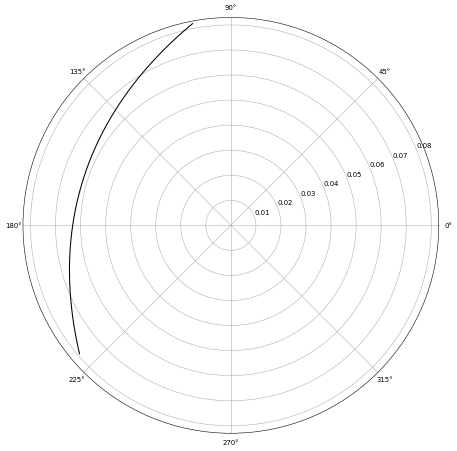

In [10]:
#[p_psp, p_solo, p_sta, p_stb, p_bepi, p_l1, p_juno, p_juice, p_uly, p_earth, p_mercury, p_venus, p_mars, p_jupiter, p_saturn, p_uranus, p_neptune]=pickle.load(open('results/positions/positions_psp_solo_sta_bepi_wind_juno_juice_ulysses_planets_HEEQ_10min_rad.p', "rb" ) )
#psp=p_psp

perihelion = parse_time('2022-09-05 17:30')
psp = get_horizons_coord('Parker Solar Probe',
                         {'start': perihelion - 0.35 * u.day,
                          'stop': perihelion + 1.33 * u.day,
                          'step': '10m'})
#psp.lon

#fs_start_ind=np.where(psp.obstime > mdates.date2num(datetime.datetime(2022, 9,5,12,0,0)))[0][0]
#fs_end_ind=np.where(psp.obstime > mdates.date2num(datetime.datetime(2022, 9,7,18,0,0)))[0][0]
#print(fs_start_ind)


[psp_x, psp_y, psp_z]=sphere2cart(psp.radius,psp.lat,psp.lon)

fig=plt.figure(1, figsize=(19.2,10.8), dpi=50) #full hd
ax = plt.subplot2grid((1,1), (0, 0), rowspan=7, projection='polar')
plt.plot(np.deg2rad(psp.lon.value),psp.radius,'k')

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
coordinates of observer  <Helioprojective Frame (obstime=2022-09-05T17:24:04.006, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2022-09-05T17:24:04.006, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (-19.55655, 6.8236486, 1.4310943e+11)>)>
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


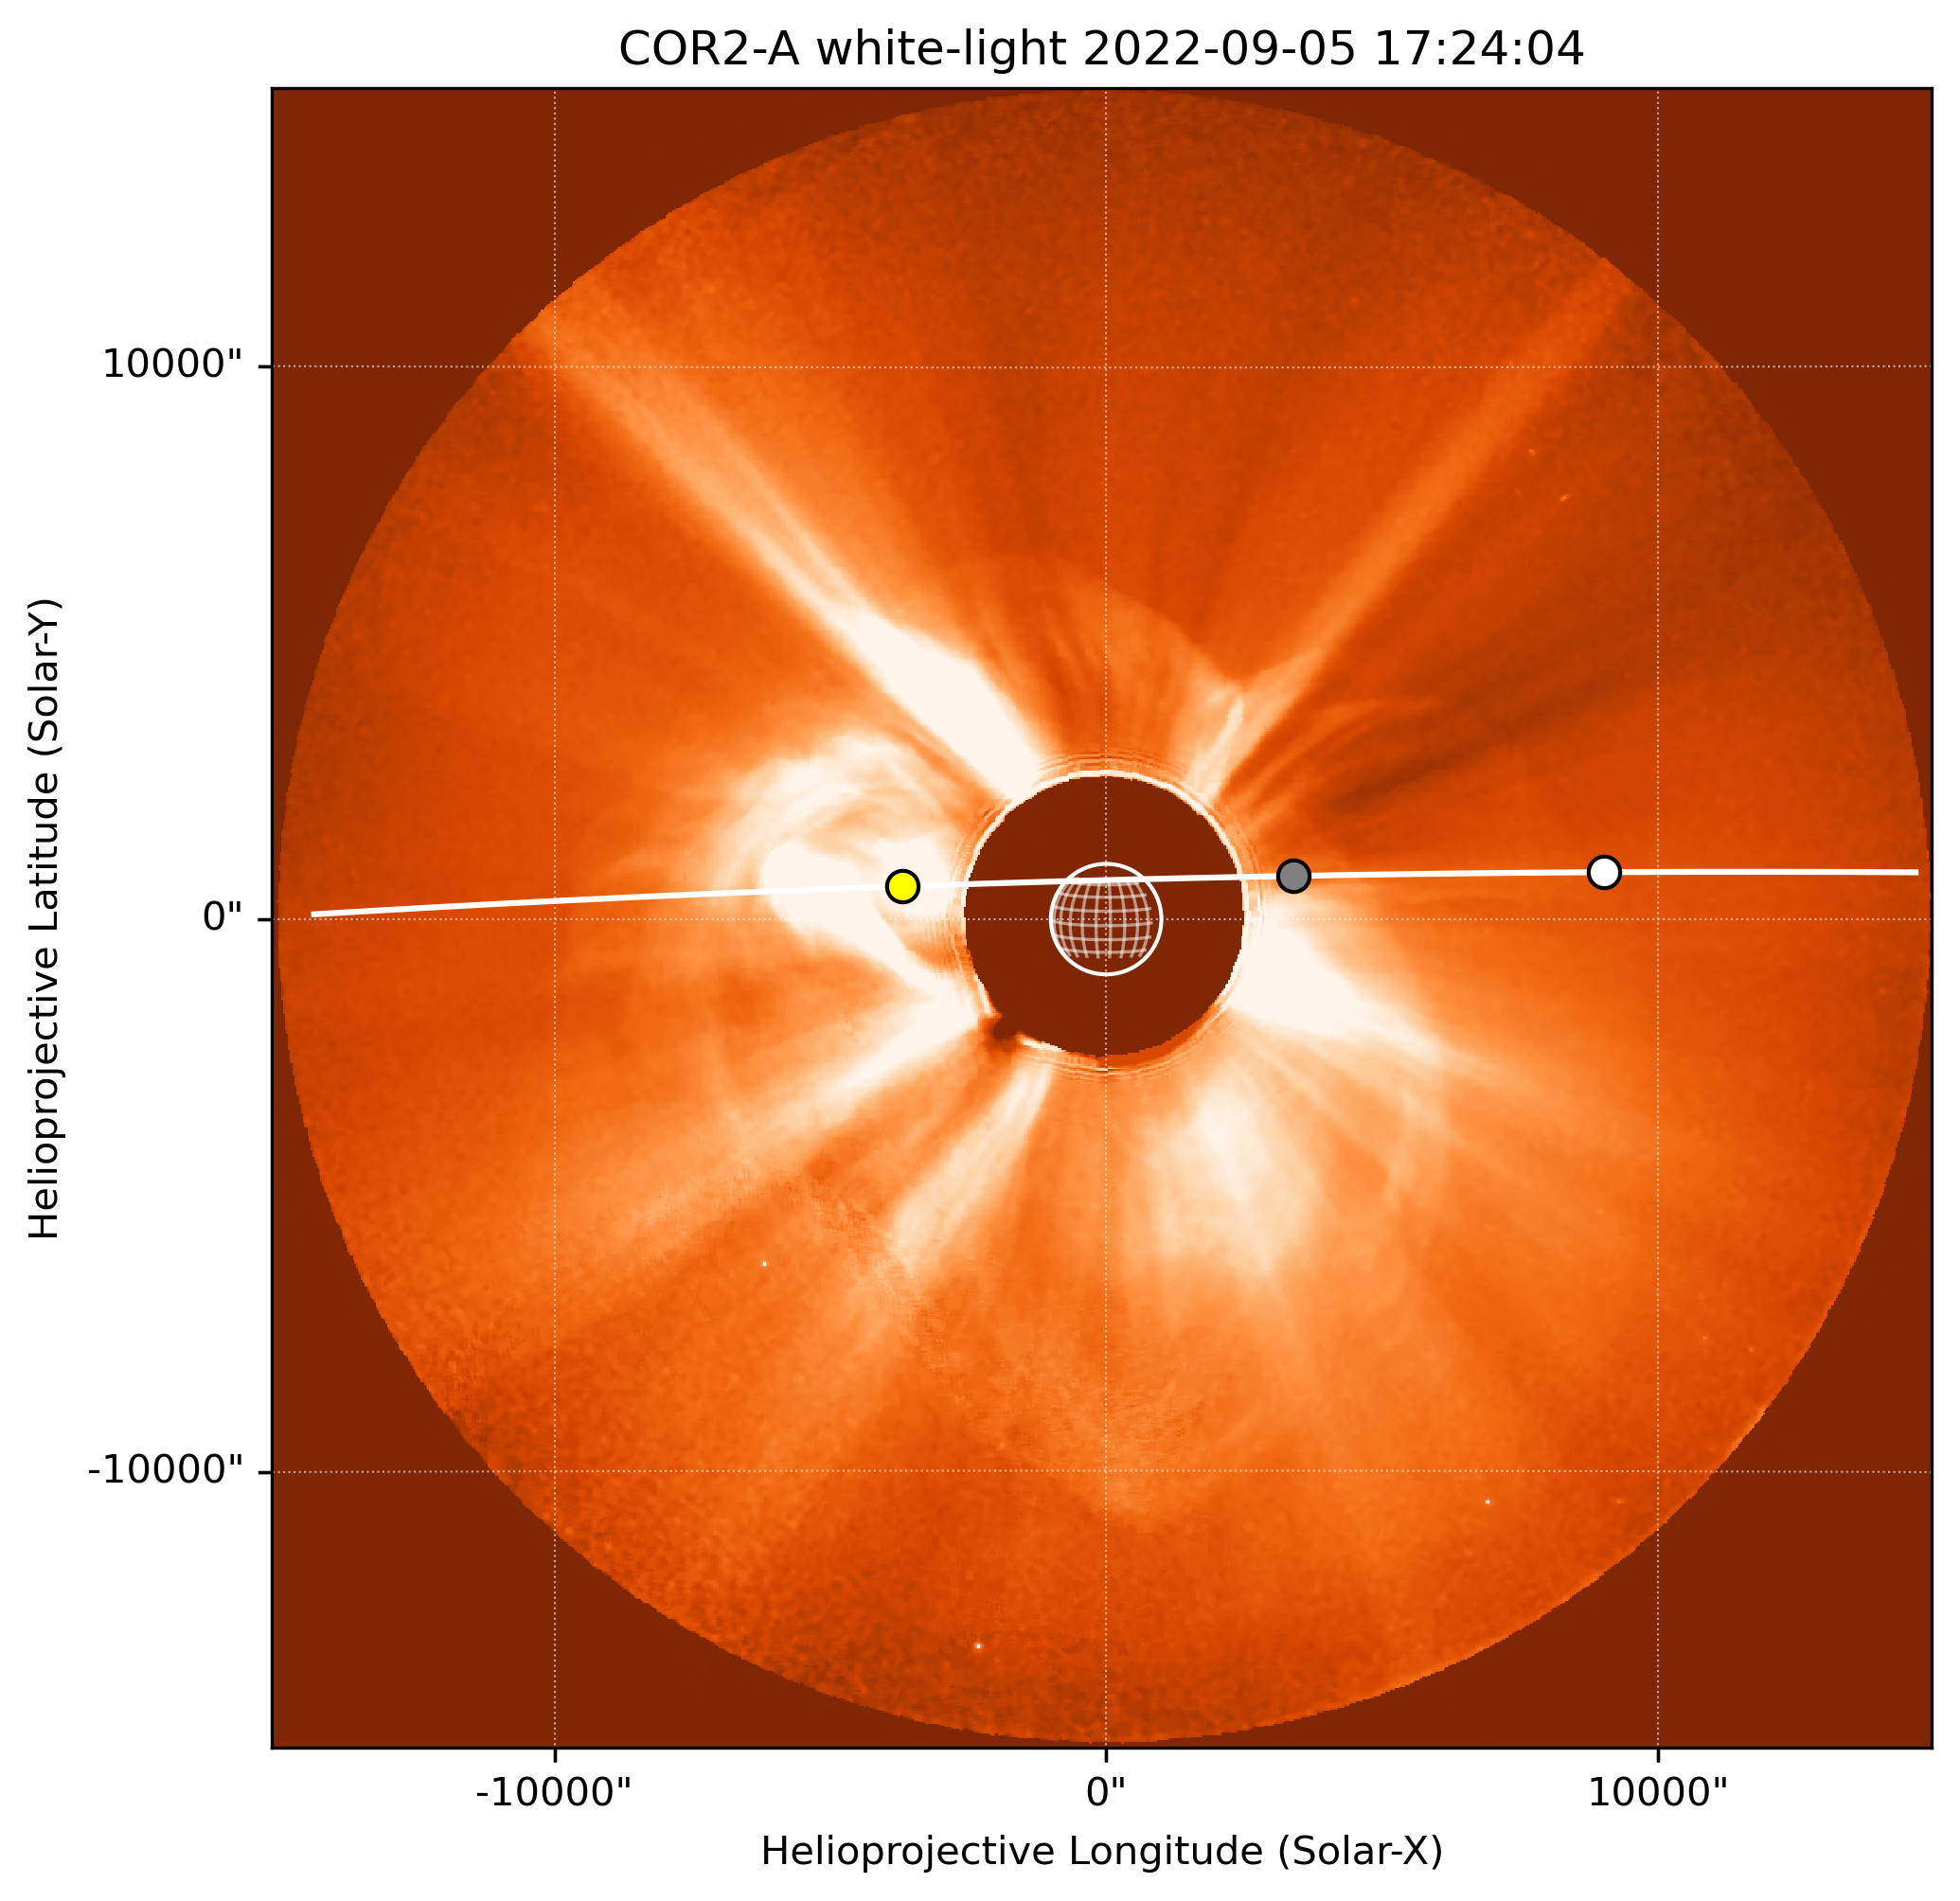

In [11]:
import sunpy
from sunpy.coordinates import frames, get_horizons_coord
from sunpy.time import parse_time
from sunpy import map
import hvpy

cor2_file = hvpy.save_file(hvpy.getJP2Image(parse_time('2022/09/05 17:30').datetime, hvpy.DataSource.COR2_A.value), "data/corona/cor2_test.jpeg", overwrite=True)
cor2 = sunpy.map.Map(cor2_file)


#cor2 = sunpy.map.Map("data/corona/cor2.jpeg")

#cor2

############################### plot 1



fig=plt.figure(1, figsize=(7,7), dpi=300) #full hd
ax1 = plt.subplot(111, projection=cor2)

print('coordinates of observer ',cor2.coordinate_frame)

#from skimage.exposure import equalize_hist
#cor2.set_data=equalize_hist(cor2.data)

#plot image
cor2.plot(cmap='Oranges_r', vmax=255)  #vmin, vmax
cor2.draw_limb()
cor2.draw_grid()


#where was PSP at CME arrival time?
psp_arrival_ind=np.where(psp.obstime.datetime > datetime.datetime(2022, 9,5,17,27,0))[0][0]

#exit of magnetic ejecta
psp_entry_ind=np.where(psp.obstime.datetime > datetime.datetime(2022, 9,5,18,50,0))[0][0]
psp_exit_ind=np.where(psp.obstime.datetime > datetime.datetime(2022, 9,6,0,57,0))[0][0]

#solo
solo_arrival_ind=np.where(psp.obstime.datetime > datetime.datetime(2022, 9,6,10,1,0))[0][0]


ax1.plot_coord(psp, 'w-' )
ax1.plot_coord(psp[psp_arrival_ind], 'o', markersize=8, mec='black', mfc='white')
#ax1.plot_coord(psp[psp_entry_ind], 'o', markersize=8, mec='black', mfc='grey')
ax1.plot_coord(psp[psp_exit_ind], 'o', markersize=8, mec='black', mfc='grey')
ax1.plot_coord(psp[solo_arrival_ind], 'o', markersize=8, mec='black', mfc='yellow')

plt.tight_layout() 
#plt.savefig('results/davies_2024_psp/figure2_cor2.pdf',dpi=100)

#plt.colorbar()

### SOHO LASCO C3

In [ ]:
lasco_file = hvpy.save_file(hvpy.getJP2Image(parse_time('2022/09/05 20:00').datetime, hvpy.DataSource.LASCO_C3.value), "data/corona/lasco1.jpeg", overwrite=True)
las = sunpy.map.Map(lasco_file)

las = sunpy.map.Map('data/corona/lasco1.jpeg')

#lasrot = las.rotate(angle=-5 * u.deg)
#las.plot()
################################### plot 1

fig=plt.figure(1, figsize=(19.2,10.8), dpi=100) #full hd
ax1 = plt.subplot(121, projection=las)

print('coordinates of observer ',las.coordinate_frame)
#print(las.wcs)

#plot image
las.plot()
las.draw_limb()
#plt.colorbar()



ax1.plot_coord(psp, 'w-' )
ax1.plot_coord(psp[psp_arrival_ind], 'o', markersize=8, mec='black', mfc='white')
#ax1.plot_coord(psp[psp_entry_ind], 'o', markersize=8, mec='black', mfc='grey')
ax1.plot_coord(psp[psp_exit_ind], 'o', markersize=8, mec='black', mfc='grey')
ax1.plot_coord(psp[solo_arrival_ind], 'o', markersize=8, mec='black', mfc='yellow')


## TO DO: read original fits files

In [5]:
from sunpy.net import Fido, attrs as a

#a. Time('2022/9/5', '2022/9/6')
#print(a.Instrument)

result = Fido.search(a.Time('2022/9/5 16:00', '2022/9/5 19:00'), a.Instrument.secchi) 
print(result)
#downloaded_files = Fido.fetch(result[0, 0]) 


result = Fido.search(a.Time('2022/9/5 16:00', '2022/9/5 20:00'), a.Instrument.lasco, a.Level.two) 

print(result)



Results from 1 Provider:

101 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search
Total estimated size: 619.157 Mbyte

       Start Time               End Time         Source  ... Wavetype Extent Type   Size 
                                                         ...                       Mibyte
----------------------- ----------------------- -------- ... -------- ----------- -------
2022-09-05 16:00:00.000 2022-09-05 16:00:20.000 STEREO_A ...    BROAD      CORONA 0.53833
2022-09-05 16:00:30.000 2022-09-05 16:00:38.000 STEREO_A ...   NARROW    FULLDISK 8.02002
2022-09-05 16:03:00.000 2022-09-05 16:03:08.000 STEREO_A ...   NARROW    FULLDISK 8.02002
2022-09-05 16:05:12.000 2022-09-05 16:05:12.000 STEREO_A ...    BROAD      CORONA 0.52185
2022-09-05 16:05:30.000 2022-09-05 16:05:38.000 STEREO_A ...   NARROW    FULLDISK 8.02002
2022-09-05 16:09:01.000 2022-09-05 16:38:41.000 STEREO_A ...    BROAD FAR_OFF_SUN 4.04022
2022-09-05 16:09:21.000 2022-09-05 17:48:11.000 